In [1]:
from qutip import * 
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# input physical parameters
dims = 141
U = 2.0
gamma_1 = 0.0
gamma_c = 10.0
tmax = 1.0
alpha_in = np.sqrt(100)
# g_b = 10

tmax = 2.0
bigGamma_desired = 432

g_b = np.sqrt((bigGamma_desired * (gamma_1 + gamma_c))/(4 * (1 + g_r**2)))
g_r = 0.412
g_a = g_b * g_r

In [82]:
# derived quantities
G = np.sqrt(g_a**2 + g_b**2)
sigma_1 = (U/(2 * (G**4))) * (g_a**4 + g_b**4)
sigma_2 = 4 * (U/(G**4)) * (g_a * g_b)**2
sigma_3 = (sigma_2/4) - (U/2)
sigma_4 = (sigma_2/4)
sigma_5 = (U/(G**4)) * g_a * g_b * (g_a**2 - g_b**2)
bigGamma = (4 * G**2)/(gamma_1 + gamma_c)
gamma_2 = bigGamma + gamma_1

In [83]:
# single_mode operators
a = destroy(dims)
a_dag = a.dag()
numop = num(dims)
one = qeye(dims)

# composite_mode operators
    # let s_minus be mode 1 and s_plus be mode 2 (for similarity with mathematica code)

s_minus = tensor(a, one)
s_minus_dag = s_minus.dag()
s_plus = tensor(one, a)
s_plus_dag = s_plus.dag()

n_minus = tensor(numop, one)
n_plus = tensor(one, numop)

# list of collapse operators
c_op_list = [np.sqrt(gamma_1) * s_minus, np.sqrt(gamma_2) * s_plus]

# defining hamiltonian
H_self = sigma_1 * (n_plus*n_plus + n_minus*n_minus) + sigma_2 * n_plus * n_minus + sigma_3 * (n_plus + n_minus)
H_kerr = sigma_4 * (s_plus_dag * s_minus)*(s_plus_dag * s_minus) + sigma_5 * s_plus_dag * s_minus * (n_minus - n_plus - 1) + sigma_4 * (s_minus_dag * s_plus) * (s_minus_dag * s_plus) + sigma_5 * s_minus_dag * s_plus * (n_minus - n_plus - 1)
H = H_self + H_kerr

e_op_list = []

In [85]:
# let's put a coherent state into mode s_-
psi_s_minus = coherent(dims, alpha_in, method="analytic")
vac = basis(dims, 0)
psi0 = tensor(psi_s_minus, vac)
rho0 = ket2dm(psi0)
times = np.linspace(0, tmax, 100)

In [86]:
myout = mcsolve(H, psi0, times, c_op_list, [n_minus], ntraj=250)

KeyboardInterrupt: 

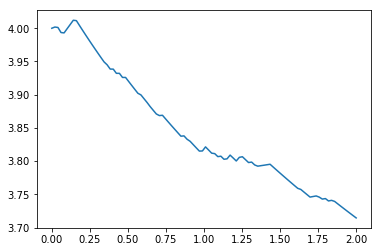

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(times, myout.expect[0])